In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the Data Set

In [50]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\ML Simplilearn Datasets\\bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Information of columns

In [51]:
print("Data shape",df.shape)

Data shape (8523, 12)


In [52]:
print(" Data Columns", df.columns)

 Data Columns Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [53]:
#check categorical columns
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
print(cat_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Check Null Values**

In [55]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Statistical Measures**

In [56]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Filling NaN values

In [61]:
# check missing values according to item identifier
item_weight_mean=df.pivot_table(values='Item_Weight', index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [62]:
miss_bool=df.Item_Weight.isna()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [63]:
for i, item in enumerate(df.Item_Weight):
    if miss_bool[i]:
        if item in item_weight_mean:
            df.Item_Weight[i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            df.Item_Weight[i]=np.mean(df.Item_Weight)

C:\Users\User\AppData\Local\Temp/ipykernel_25524/1752598056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[i]=np.mean(df.Item_Weight)


In [65]:
df.Item_Weight.isna().sum()

0

In [66]:
#fill nan values in Outlet_Size with Mode of column
outlet_size_mode=df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [67]:
# fill the outlet size with mode wrt to outlet type
miss_bool=df.Outlet_Size.isna()
df.loc[miss_bool, 'Outlet_Size']=df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
df.Outlet_Size.isna().sum()

0

**Outliers in Item_Visibility column**

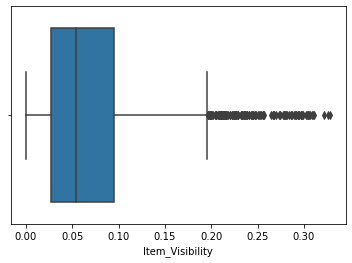

In [68]:
#check outliers in Item_Visibility column
sns.boxplot(x='Item_Visibility', data=df);

In [69]:
#treat the outliers
Q1=df['Item_Visibility'].quantile(0.25)
Q3=df['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

0.0269894775
0.0945852925
0.067595815


In [70]:
#create data frame after removing outliers
fill_data=df.query('(@Q1-1.5*@IQR)<=Item_Visibility<=(@Q3+1.5*@IQR)')
fill_data.shape

(8379, 12)

In [71]:
df=fill_data
df.shape

(8379, 12)

In [72]:
#create bins for Item_Visibility column
df['Item_Visibility_bins']=pd.cut(df['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])
df['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [73]:
#fill nan with Low Viz
df['Item_Visibility_bins'].fillna("Low Viz",inplace=True)
df['Item_Visibility_bins'].value_counts()

Low Viz     4929
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [74]:
#unique values in Item_Fat_Content
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [75]:
#replace multiple occuring values of similar type
df.Item_Fat_Content.replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
label=LabelEncoder()

In [78]:
df.Item_Fat_Content=label.fit_transform(df.Item_Fat_Content)
df.Item_Fat_Content.unique()

array([0, 1])

In [79]:
df.Item_Visibility_bins=label.fit_transform(df.Item_Visibility_bins)
df.Item_Visibility_bins.unique()

array([1, 2, 0])

In [80]:
df.Outlet_Size=label.fit_transform(df.Outlet_Size)
df.Outlet_Size.unique()

array([1, 2, 0])

In [81]:
df.Outlet_Location_Type=label.fit_transform(df.Outlet_Location_Type)
df.Outlet_Location_Type.unique()

array([0, 2, 1])

In [82]:
#unique values in Outlet_type
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [83]:
#create dummies for Outlet_Type
dum1=pd.get_dummies(df.Outlet_Type)
dum1.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [84]:
#Different values for Item_Identifier column
df.Item_Identifier

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8379, dtype: object

In [85]:
#there are multiple values in Item_Identifier wrt Item_type so combine them
df['Item_Identifier_Combined']=df['Item_Identifier'].apply(lambda x:x[0:2])
df['Item_Identifier_Combined']=df['Item_Identifier_Combined'].map({'FD':'Food',
                                                         'NC':'Non-Consumable',
                                                         'DR':'Drinks'})
df['Item_Identifier_Combined'].value_counts()

Food              6010
Non-Consumable    1580
Drinks             789
Name: Item_Identifier_Combined, dtype: int64

In [88]:
# create small values for establishment year
df['Outlet_Year']=2013-df['Outlet_Establishment_Year']
df.Outlet_Year

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Establishment_Year, Length: 8379, dtype: int64

In [89]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_bins,Item_Identifier_Combined,Outlet_Year
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,1,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,1,Drinks,4


In [90]:
#create dummies for Item_Type
dum2=pd.get_dummies(df.Item_Type)
dum2.head()

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [91]:
dum3=pd.get_dummies(df.Item_Identifier_Combined)
dum3.head()

,Drinks,Food,Non-Consumable
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


In [92]:
df.shape

(8379, 15)

In [93]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_bins,Item_Identifier_Combined,Outlet_Year
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,1,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,1,Drinks,4


In [94]:
df.drop(['Item_Identifier','Item_Visibility','Item_Type','Outlet_Type','Outlet_Identifier','Item_Identifier_Combined','Outlet_Establishment_Year'], axis=1, inplace=True)
df.head(2)

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_bins,Outlet_Year
0,9.30,0,249.8092,1,0,3735.1380,1,14
1,5.92,1,48.2692,1,2,443.4228,1,4


In [95]:
#Concat the dummies to create new data set
data=pd.concat([df,dum1,dum2,dum3], axis=1)
data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_bins,Outlet_Year,Grocery Store,Supermarket Type1,...,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Drinks,Food,Non-Consumable
0,9.30,0,249.8092,1,0,3735.1380,1,14,0,1,...,0,0,0,0,0,0,0,0,1,0
1,5.92,1,48.2692,1,2,443.4228,1,4,0,0,...,0,0,0,0,0,1,0,1,0,0
2,17.50,0,141.6180,1,0,2097.2700,1,14,0,1,...,0,1,0,0,0,0,0,0,1,0
3,19.20,1,182.0950,2,2,732.3800,1,15,1,0,...,0,0,0,0,0,0,0,0,1,0
4,8.93,0,53.8614,0,2,994.7052,1,26,0,1,...,1,0,0,0,0,0,0,0,0,1


In [96]:
data.dtypes

Item_Weight              float64
Item_Fat_Content           int32
Item_MRP                 float64
Outlet_Size                int32
Outlet_Location_Type       int32
Item_Outlet_Sales        float64
Item_Visibility_bins       int32
Outlet_Year                int64
Grocery Store              uint8
Supermarket Type1          uint8
Supermarket Type2          uint8
Supermarket Type3          uint8
Baking Goods               uint8
Breads                     uint8
Breakfast                  uint8
Canned                     uint8
Dairy                      uint8
Frozen Foods               uint8
Fruits and Vegetables      uint8
Hard Drinks                uint8
Health and Hygiene         uint8
Household                  uint8
Meat                       uint8
Others                     uint8
Seafood                    uint8
Snack Foods                uint8
Soft Drinks                uint8
Starchy Foods              uint8
Drinks                     uint8
Food                       uint8
Non-Consum

In [97]:
data.isna().sum()

Item_Weight              0
Item_Fat_Content         0
Item_MRP                 0
Outlet_Size              0
Outlet_Location_Type     0
Item_Outlet_Sales        0
Item_Visibility_bins     0
Outlet_Year              0
Grocery Store            0
Supermarket Type1        0
Supermarket Type2        0
Supermarket Type3        0
Baking Goods             0
Breads                   0
Breakfast                0
Canned                   0
Dairy                    0
Frozen Foods             0
Fruits and Vegetables    0
Hard Drinks              0
Health and Hygiene       0
Household                0
Meat                     0
Others                   0
Seafood                  0
Snack Foods              0
Soft Drinks              0
Starchy Foods            0
Drinks                   0
Food                     0
Non-Consumable           0
dtype: int64

**Divide our data into Dependent & Independent Variable**

In [98]:
X=data.drop('Item_Outlet_Sales', axis=1)
y=data.Item_Outlet_Sales
print('Dependent Variable :', y)
print('Independent Variable :', X)

Dependent Variable : 0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8379, dtype: float64
Independent Variable :       Item_Weight  Item_Fat_Content  Item_MRP  Outlet_Size  \
0           9.300                 0  249.8092            1   
1           5.920                 1   48.2692            1   
2          17.500                 0  141.6180            1   
3          19.200                 1  182.0950            2   
4           8.930                 0   53.8614            0   
...           ...               ...       ...          ...   
8518        6.865                 0  214.5218            0   
8519        8.380                 1  108.1570            2   
8520       10.600                 0   85.1224            2   
8521        7.210                 1  103.1332            1   
8522       14.800     

**Standardize the data**

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
#y=scaler.fit_transform(y)
print(X)

[[-0.84040636 -0.73656349  1.7479249  ... -0.32241676  0.62783467
  -0.48206547]
 [-1.63724716  1.35765622 -1.48870156 ...  3.10157571 -1.59277601
  -0.48206547]
 [ 1.0927577  -0.73656349  0.0104311  ... -0.32241676  0.62783467
  -0.48206547]
 ...
 [-0.53392913 -0.73656349 -0.89685854 ... -0.32241676 -1.59277601
   2.07440704]
 [-1.33312745  1.35765622 -0.60761456 ... -0.32241676  0.62783467
  -0.48206547]
 [ 0.45622807 -0.73656349 -1.05191919 ...  3.10157571 -1.59277601
  -0.48206547]]


**Split data into train & test set**

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
print(X_test)

[[-1.32133986e+00 -7.36563489e-01 -3.67014729e-01 ... -3.22416763e-01
   6.27834670e-01 -4.82065468e-01]
 [-1.66082233e+00 -7.36563489e-01  4.56258163e-01 ... -3.22416763e-01
  -1.59277601e+00  2.07440704e+00]
 [-1.50876248e+00 -7.36563489e-01  2.01096624e+00 ... -3.22416763e-01
   6.27834670e-01 -4.82065468e-01]
 ...
 [ 1.84716319e+00 -7.36563489e-01  1.56871019e-01 ... -3.22416763e-01
  -1.59277601e+00  2.07440704e+00]
 [-1.68541029e-03 -7.36563489e-01  1.79312529e-01 ...  3.10157571e+00
  -1.59277601e+00 -4.82065468e-01]
 [ 1.11633287e+00 -7.36563489e-01  2.19419460e-01 ... -3.22416763e-01
   6.27834670e-01 -4.82065468e-01]]


In [101]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model=model.fit(X_train, y_train)
print('Training Score', model.score(X_train,y_train))
print('Testing Score', model.score(X_test,y_test))

Training Score 0.5551039220275675
Testing Score 0.5629175273875399


**Accuracy of model is very low**

**Use Regularization to improve accuracy**

### Lasso Regularization

In [103]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 50, max_iter = 100,tol = 0.1)
lasso = lasso_reg.fit(X_train, y_train)
print('Training Score', lasso_reg.score(X_train,y_train))
print('Testing Score', lasso_reg.score(X_test,y_test))

Training Score 0.5517771012612214
Testing Score 0.5639507221580448


### Ridge Regression

In [104]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 50, max_iter = 100,tol = 0.1)
ridge = ridge_reg.fit(X_train, y_train)
print('Training Score', ridge_reg.score(X_train,y_train))
print('Testing Score', ridge_reg.score(X_test,y_test))

Training Score 0.5551783529797522
Testing Score 0.5627358397592643
